* Bag of Ngram - CountVectorizer

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(['All mighty thor is looking for a job!!'])
v.vocabulary_

{'all': 0, 'mighty': 5, 'thor': 6, 'is': 2, 'looking': 4, 'for': 1, 'job': 3}

In [2]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(['All mighty thor is looking for a job!!'])
v.vocabulary_

{'all': 0,
 'mighty': 9,
 'thor': 11,
 'is': 4,
 'looking': 7,
 'for': 2,
 'job': 6,
 'all mighty': 1,
 'mighty thor': 10,
 'thor is': 12,
 'is looking': 5,
 'looking for': 8,
 'for job': 3}

In [3]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(['All mighty thor is looking for a job!!'])
v.vocabulary_

{'all': 0,
 'mighty': 12,
 'thor': 15,
 'is': 5,
 'looking': 9,
 'for': 3,
 'job': 8,
 'all mighty': 1,
 'mighty thor': 13,
 'thor is': 16,
 'is looking': 6,
 'looking for': 10,
 'for job': 4,
 'all mighty thor': 2,
 'mighty thor is': 14,
 'thor is looking': 17,
 'is looking for': 7,
 'looking for job': 11}

In [4]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [5]:
import spacy

In [15]:
nlp = spacy.load('en_core_web_sm')
doc = nlp("Sam ate banana before workout!!")

In [23]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_punct or token.is_stop:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [24]:
preprocess(doc)

'Sam eat banana workout'

In [26]:
corpus_preprocessed  = [preprocess(it) for it in corpus]
corpus_preprocessed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [28]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_preprocessed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [34]:
new = v.transform(["Hulk eat pizza"]).toarray()
new

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [42]:
import pandas as pd

In [44]:
df = pd.read_json('news_dataset.json')
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [77]:
df.category.unique()

array(['SCIENCE', 'BUSINESS', 'CRIME', 'SPORTS'], dtype=object)

In [46]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [53]:
min_sample = 1381
df_business = df[df["category"]=='BUSINESS'].sample(min_sample,random_state=2022)
df_sports = df[df["category"]=='SPORTS'].sample(min_sample,random_state=2022)
df_crime = df[df["category"]=='CRIME'].sample(min_sample,random_state=2022)
df_science = df[df["category"]=='SCIENCE'].sample(min_sample,random_state=2022)

In [55]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.head()

,text,category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS
2912,From the Other Side; an Honest Review from Emp...,BUSINESS
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS
502,How to Market Your Business While Traveling th...,BUSINESS
5279,How to Leverage Intuition in Decision-making I...,BUSINESS


In [58]:
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [59]:
category_map = {
    
    "BUSINESS" : 0,
    "SPORTS": 1,
    "CRIME": 2,
    "SCIENCE":3
}

In [64]:
df_balanced['category_num'] =  df.category.map(category_map)
df.head()

,text,category,category_num
0,Watching Schrödinger's Cat Die University of C...,SCIENCE,3
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE,3
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS,0
3,These Roads Could Recharge Your Electric Car A...,BUSINESS,0
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME,2


In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
     df_balanced.text,
     df_balanced.category_num,
     test_size=0.2,
     random_state=2022,
     stratify=df_balanced.category_num
 )

In [69]:
X_train.shape

(4419,)

In [71]:
y_train.value_counts()

category_num
3    1105
2    1105
0    1105
1    1104
Name: count, dtype: int64

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,1))),
    ('nb',MultinomialNB())
])

clf.fit(X_train,y_train)

,steps,"[('cv', ...), ('nb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [76]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [79]:
test = ["Astronomers observed a mysterious deep-space explosion lasting seven hours, challenging existing models of cosmic events.",
        "Foreign Portfolio Investors have withdrawn significant capital from Indian equities amid global economic uncertainty.",
        "Police arrested a man accused of cheating investors by running a fake stock trading firm promising high returns."
]

In [81]:
test_cv = clf.predict(test)
test_cv

array([3, 0, 2])

In [83]:
map_check = {
    
    0:"BUSINESS",
    1: "SPORTS",
    2: "CRIME",
    3: "SCIENCE"
}

In [84]:
[map_check[i] for i in test_cv]

['SCIENCE', 'BUSINESS', 'CRIME']

### With Preprocessing

In [88]:
df_balanced['prepo_test'] = df_balanced['text'].apply(preprocess)

In [89]:
df_balanced.head()

,text,category,category_num,prepo_test
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business leader remain confident Face Regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review Employees wake morning love impo...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment CEO FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,leverage intuition decision making feel safe r...


In [90]:
X_train,X_test,y_train,y_test = train_test_split(
     df_balanced.prepo_test,
     df_balanced.category_num,
     test_size=0.2,
     random_state=2022,
     stratify=df_balanced.category_num
 )

In [91]:
clf = Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,1))),
    ('nb',MultinomialNB())
])

clf.fit(X_train,y_train)

,steps,"[('cv', ...), ('nb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [92]:
y_pred = clf.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       276
           1       0.93      0.82      0.87       277
           2       0.81      0.91      0.86       276
           3       0.91      0.83      0.87       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



In [94]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[240,   8,  17,  11],
       [  8, 226,  36,   7],
       [ 17,   3, 252,   4],
       [ 34,   6,   6, 230]])

In [100]:
labels = df_balanced.category.unique()
labels

array(['BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE'], dtype=object)

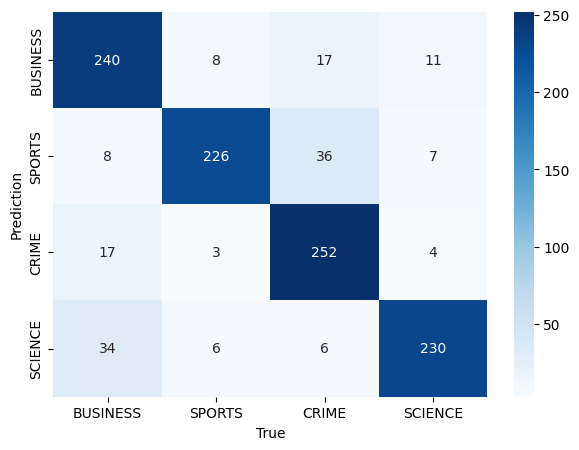

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Blues")
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

In [ ]:
,